# Basic charts in pandas

### documentation

> https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html

> Source (pubs): https://www.ons.gov.uk/businessindustryandtrade/business/activitysizeandlocation/datasets/publichousesandbarsbylocalauthority

> Source (population): https://statswales.gov.wales/Catalogue/Population-and-Migration/Population/Estimates/Local-Authority/populationestimates-by-localauthority-year

> plots available in pandas


        ‘line’ : line plot (default)
        ‘bar’ : vertical bar plot
        ‘barh’ : horizontal bar plot
        ‘hist’ : histogram
        ‘box’ : boxplot
        ‘kde’ : Kernel Density Estimation plot
        ‘density’ : same as ‘kde’
        ‘area’ : area plot
        ‘pie’ : pie plot
        ‘scatter’ : scatter plot
        ‘hexbin’ : hexbin plot



In [150]:
import pandas as pd


In [151]:
# import population data in Wales for 2001, 2018

path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'wales_population.csv'

pop = pd.read_csv(path + file)

In [152]:
pop[:3]

,area,pop_one,pop_eighteen
0,Isle of Anglesey,"67,806","69,961"
1,Gwynedd,"116,844","124,178"
2,Conwy,"109,674","117,181"


In [153]:
# check data types 

pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   area          22 non-null     object
 1   pop_one       22 non-null     object
 2   pop_eighteen  22 non-null     object
dtypes: object(3)
memory usage: 656.0+ bytes


In [154]:
# fix integers

# remove the ,
pop = pop.replace(',','', regex = True)

# cast population columns to integers
pop.pop_one = pop.pop_one.astype(int)
pop.pop_eighteen = pop.pop_eighteen.astype(int)

In [155]:
# check datatypes again

print(pop.info())
pop[:3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   area          22 non-null     object
 1   pop_one       22 non-null     int64 
 2   pop_eighteen  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes
None


,area,pop_one,pop_eighteen
0,Isle of Anglesey,67806,69961
1,Gwynedd,116844,124178
2,Conwy,109674,117181


## Bar chart

In [156]:
# use area names column as index (instead of row numbers) - this will label the x axis

pop.set_index('area', inplace=True)

<AxesSubplot:xlabel='area'>

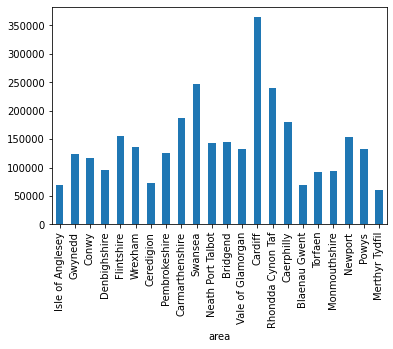

In [157]:
# bar chart

pop.pop_eighteen.plot(kind = 'bar')

<AxesSubplot:ylabel='area'>

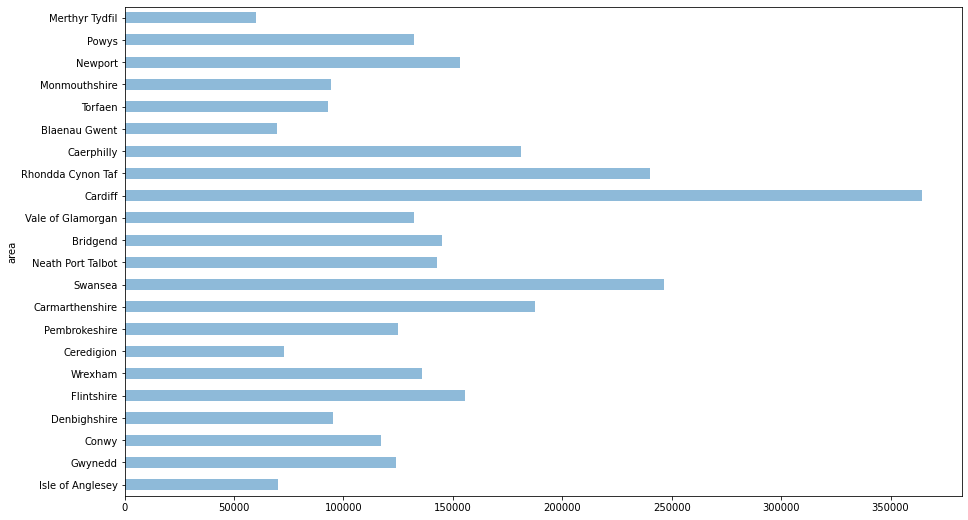

In [159]:
# # horizontal bar chart, with adjusted opacity and figure size

pop.pop_eighteen.plot(kind = 'barh', y = 'population (2018)', alpha = 0.5, figsize=(15,9))

<AxesSubplot:title={'center':'Population estimates mid-2001 & mid-2018 in Wales (by local authority)'}, ylabel='Area'>

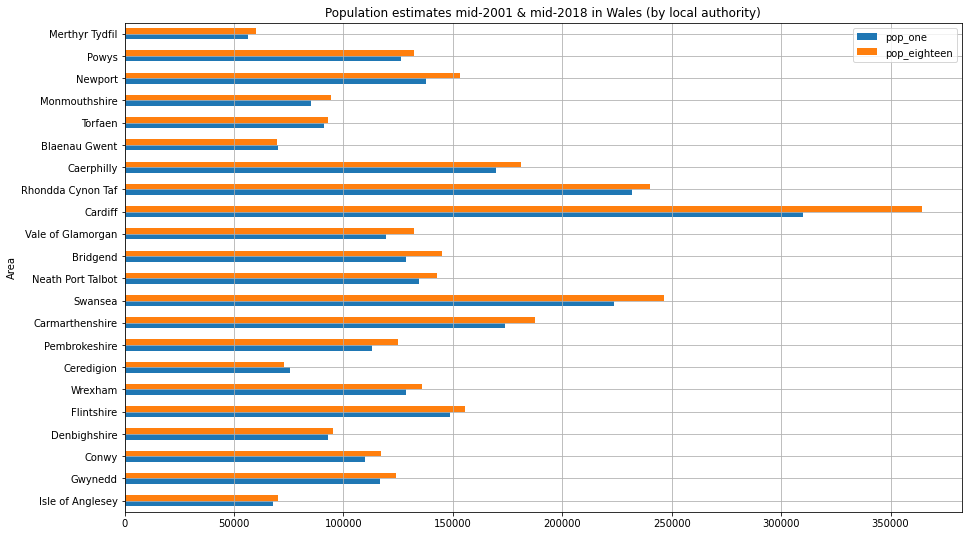

In [165]:
# stacked barchart with title, grid and labels

pop[['pop_one','pop_eighteen']].plot(kind = 'barh', 
                                     figsize=(15,9),
                                     title = 'Population estimates mid-2001 & mid-2018 in Wales (by local authority)',
                                     grid = True,
                                     stacked = False,
                                     xlabel = 'Area', 
                                     ylabel = 'Population')

## Linechart

> using numbers of pubs in Wales by local authority 2001-18

In [174]:
path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'wales_pubs_area_2001_18.csv'

years = pd.read_csv(path + file)

In [183]:
# set the area name as the index

years = years.set_index('area')

In [206]:
# transpose the df so the years run on the vertical index

years = years.transpose()

<AxesSubplot:>

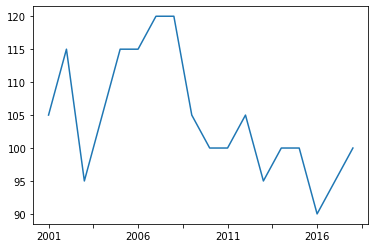

In [216]:
years['Conwy'].plot()

<AxesSubplot:>

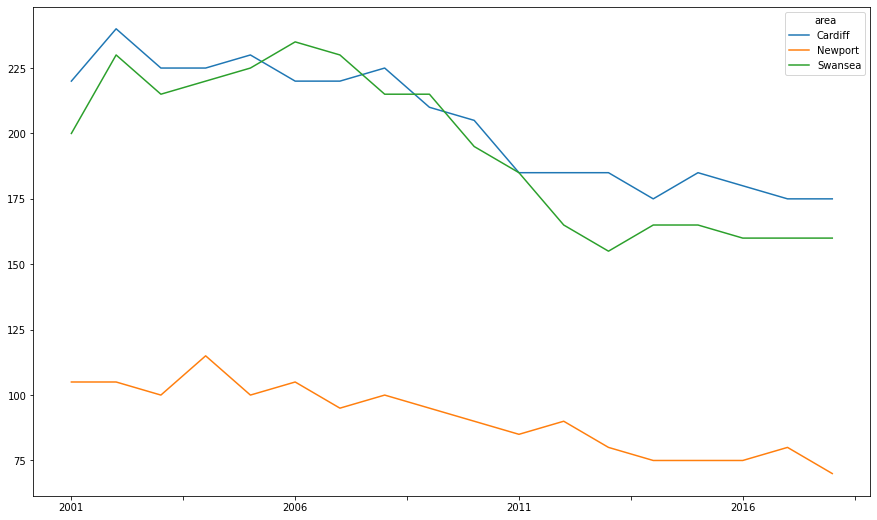

In [215]:
years[['Cardiff', 'Newport', 'Swansea']].plot(figsize = (15, 9))

## Scatterplot

> Wales pubs and population in 2018: gives a (dependent) variable to set against population: the number of pubs in local authorities

In [168]:
path = '/Users/aidanair/Documents/DATA/ALL_DATASETS/'
file = 'wales_all.csv'

pp = pd.read_csv(path + file)

In [169]:
pp[:3]

,area,pubs,pop
0,Isle of Anglesey,60,69961
1,Gwynedd,120,124178
2,Conwy,100,117181


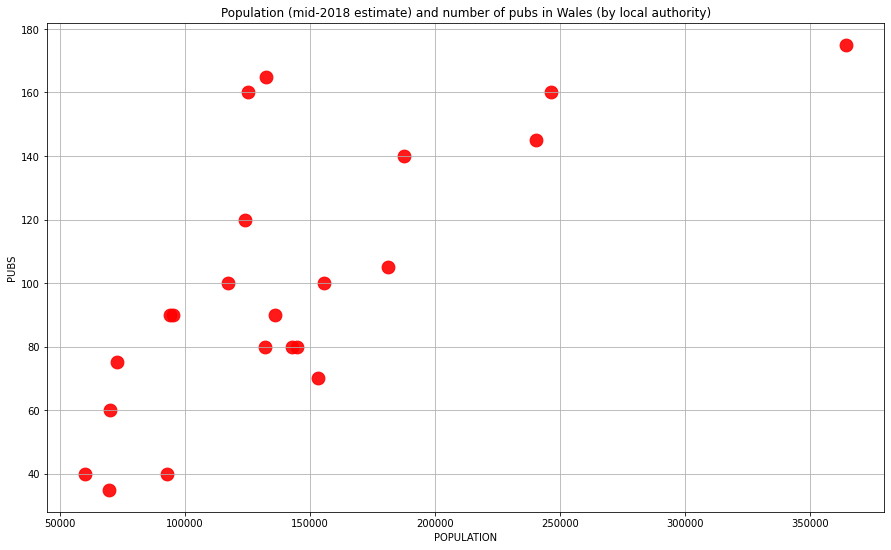

In [173]:
# scatterplot with dotsize (s) and dotcolour (c)

pp.plot(kind = 'scatter', 
        x = 'pop', 
        y = 'pubs', 
        figsize=(15,9),
        alpha = 0.9,
        title = ('Population (mid-2018 estimate) and number of pubs in Wales (by local authority)'),
        grid = True,
        s = 165, 
        c = 'r',
        xlabel = 'POPULATION',
        ylabel = 'PUBS')

# save to current directory
plt.savefig('wales_pop_pub.png')

## Histogram

<AxesSubplot:>

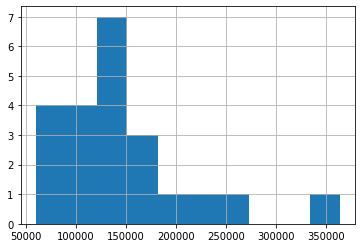

In [166]:
# histogram on a single column

pop.pop_eighteen.hist()

<AxesSubplot:title={'center':'Population estimates mid-2001 & mid-2018 in Wales (by local authority)'}, ylabel='Frequency'>

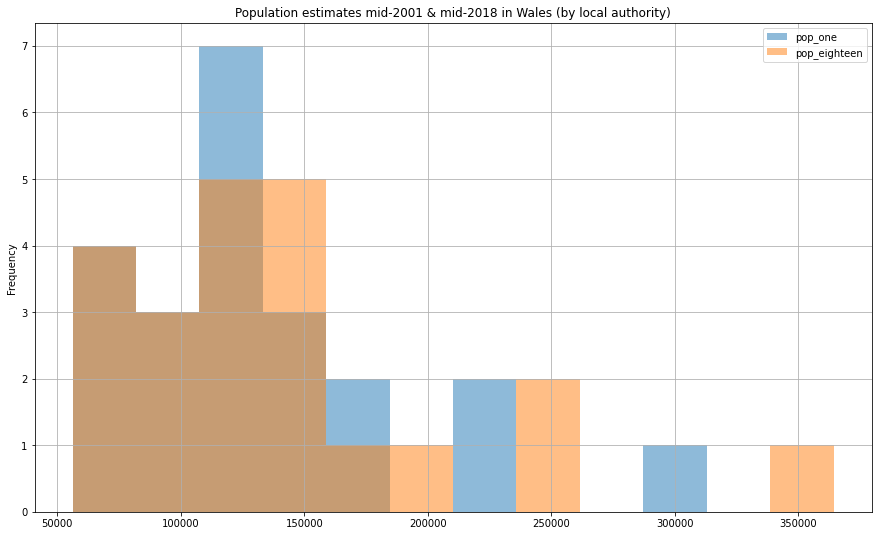

In [167]:
# histogram on both cols

pop[['pop_one','pop_eighteen']].plot(kind = 'hist', 
                                     alpha = 0.5, 
                                     figsize=(15,9),
                                     title = 'Population estimates mid-2001 & mid-2018 in Wales (by local authority)',
                                     grid = True,
                                     stacked = False,
                                     bins = 12,
                                     xlabel = 'Area', 
                                     ylabel = 'Population')


## Piechart

<AxesSubplot:ylabel='pop_one'>

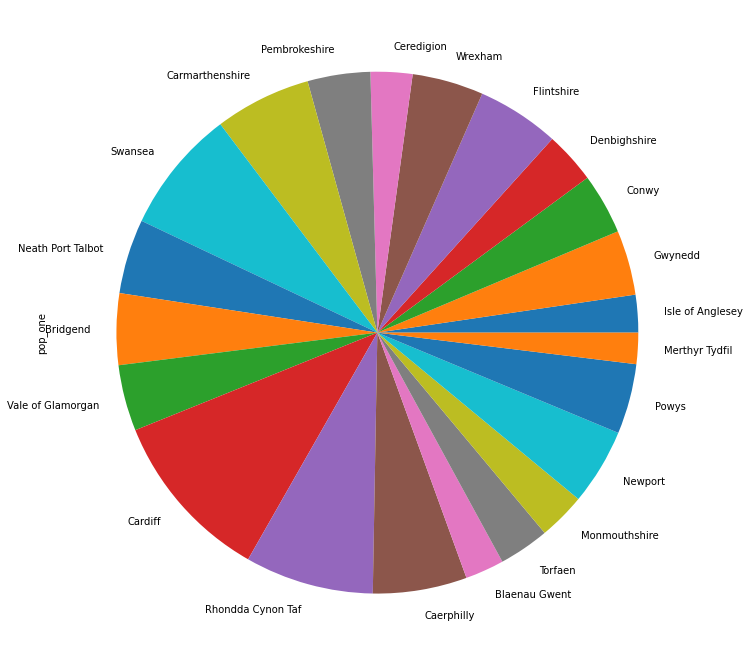

In [138]:
# piechart

pop['pop_one'].plot.pie(figsize=(20,12))


## Boxplot

<AxesSubplot:>

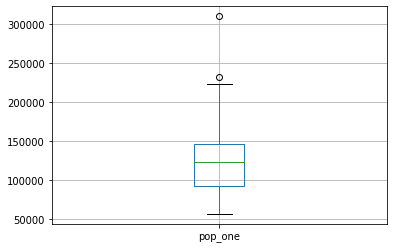

In [161]:
# box plots by single column...

pop.boxplot('pop_one') 

<AxesSubplot:>

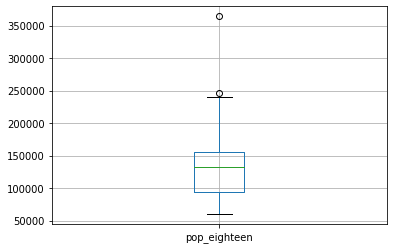

In [162]:
pop.boxplot('pop_eighteen')

<AxesSubplot:>

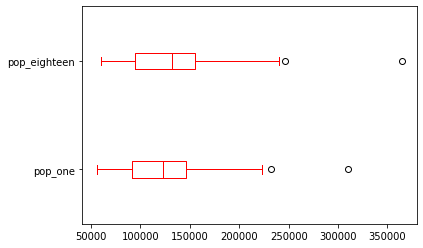

In [164]:
# ... and by df (with default vertical turned off) and colour selected

pop.boxplot(vert = False, grid = False, color = 'red')